# Interesting Pairs
The examples below were manually extracted in July, 2017. The generated datasets are available, for invited users, at:

* https://drive.google.com/drive/folders/0B-gHVAUxz8rBd1RPblNxdHpwZjg?usp=sharing

# File contents

## All events from a pair
A file with name as below, is composed of:
    
`CaseAntennaObserving-ALL-577-596.json`

Case | Color A | Color B | Contents 
---- | ------- | ------- | --------
CaseAntennaObserving | 577 | 596 | Single set with all for pair (A,B), ALL cases mixed up.

The content of the file is in native JSON format:
```
[16789, 19404, 16924]
```

## Separated events by instance
Inside there is a directory called `timestamp`. It contains a similar name convention but separated by cases, identified by the timestamp of the first event in the *case sequence* (not first in pairs). This allows to compare cases of different pairs, if needed.

`timestamp/CaseAntennaObserving-577-596.json`

Case | Color A | Color B | Contents 
---- | ------- | ------- | --------
CaseAntennaObserving | 577 | 596 | Dictionary with multiple set of delays, with key=TIMESTAMP (milliseconds from UNIX Epoch)

In this case, there are 3 cases with just 1 delay each.
```
{
  "1499760795544": [16789], 
  "1499262324610": [19404], 
  "1499785006936": [16924]
}
```




# Dataset
Below are some metrics for colors and pairs for CaseAntennaObserving 

In [76]:
from src import *
from src.models.AlmaClasses import *

palette = PaletteFileDB(
    filename='../data/processed/colors-almaAntenna.pkl', 
    colorFunction=paintedForAlmaAntennas )

db = DelaysFileDB( 
    caseName="CaseAntennaObserving", 
    path= '../' + config.FILEPATH_DB + "/delays")  

In [77]:
len(db.unique_colors())

130

In [78]:
db.total_pairs()

4116

In [79]:
db.total_cases()

155

# Analysis for Manually Selected Pairs
Below is the code use to perform each analysis.
* Set is cropped to 100 elements for brevity. 
* Values are sorted for better readability. They are unordered by nature.

In [226]:
from pandas import Series
from matplotlib import pyplot
import numpy as np

def perform_analysis_on( a, b, c ):
    print "--- %s ---" % (c)
    print
    print "C_%s: %s" % (a, palette.getColors()[a])
    print
    print "C_%s: %s" % (b, palette.getColors()[b])
    print
    delay = sorted(db.getDelays(a,b), reverse=True)
    SHOW=100
    if len(delay) < SHOW:
        print delay
    else:
        print delay[:int(SHOW/2)], "... (%s ommited) ..." % (len(delay) - SHOW) , delay[-int(SHOW/2):]
    print
    
    print "1) Raw serie:"
    serie = Series(delay)
    pyplot.plot(serie)
    pyplot.show()
    print(serie.describe())
    print
    
    CROP=0.8
    print "2) Cropping the serie: (%s%% of middle points only)" % (CROP*100)
    serie3 = serie[ int(len(serie)*( (1-CROP)/2 )+0.5) : int(len(serie)*( 1-(1-CROP)/2 )-0.5) ]
    pyplot.plot( serie3 )
    pyplot.show()
    print(serie3.describe())    

    print "3) Log on time graph of the serie"
    serie2 = np.log(serie + 1)
    pyplot.plot(serie2)
    pyplot.show()
    print(serie2.describe())
    print 


## Few cases, many pairs found

--- 14 cases (9%) with 51 delays in total ---

C_537: [CONTROL/${ANT}/FrontEnd - void FrontEndImpl::lockFrontEndInternal(Control::FrontEnd::SubscanInformation, bool, bool)] Receiver band was already locked at ${N}

C_538: [CONTROL/${ANT}/cppContainer-GL - void PositionStreamConsumer::processData(Control::MountStatusData)] At ${N}:${N}:${N} got the last needed data with a timestamp of ${N}:${N}:${N}. The delay is ${N} seconds.

[66241, 66234, 66220, 66217, 66186, 66171, 66166, 66159, 66154, 66122, 66106, 66091, 66090, 66089, 66086, 65628, 65589, 65572, 65547, 65518, 61929, 47351, 16107, 16079, 16071, 16065, 16063, 16062, 16005, 15564, 15552, 15542, 15529, 15529, 15521, 15500, 15492, 15491, 15483, 15476, 15475, 15474, 15473, 15468, 15467, 15463, 15461, 15456, 15456, 15450, 15443]

1) Raw serie:


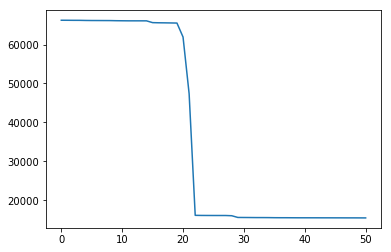

count       51.000000
mean     36915.352941
std      24822.586296
min      15443.000000
25%      15487.000000
50%      16065.000000
75%      66089.500000
max      66241.000000
dtype: float64

2) Cropping the serie: (80.0% of middle points only)


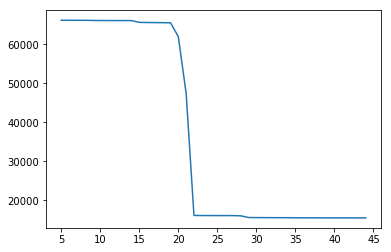

count       40.000000
mean     36471.400000
std      24673.839459
min      15467.000000
25%      15515.750000
50%      16068.000000
75%      65742.500000
max      66171.000000
dtype: float64
3) Log on time graph of the serie


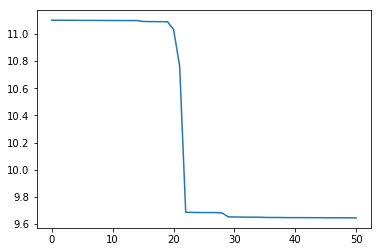

count    51.000000
mean     10.270522
std       0.713285
min       9.644976
25%       9.647821
50%       9.684461
75%      11.098780
max      11.101070
dtype: float64



In [227]:
perform_analysis_on(537, 538, '14 cases (9%) with 51 delays in total')

--- 9 cases (5%) with 57 delays in total ---

C_576: [CONTROL/${ANT}/LOtwoBBpr_B - virtual void LO${N}Engine::setFrequency(double, Control::LOOffsettingMode, NetSidebandMod::NetSideband, ACS::Time)] Setting the LO${N} frequency to ${N}GHz at ${N}:${N}:${N}. This baseband is above the first LO. Two LO offsetting will be used Retuning as this is diferent from the current state at this time

C_575: [CONTROL/${ANT}/LOtwoBBpr_A - virtual void LO${N}Engine::setFrequency(double, Control::LOOffsettingMode, NetSidebandMod::NetSideband, ACS::Time)] Setting the LO${N} frequency to ${N}GHz at ${N}:${N}:${N}. This baseband is above the first LO. Two LO offsetting will be used Retuning as this is diferent from the current state at this time

[879666, 565450, 560876, 549554, 548117, 544386, 543076, 532145, 530308, 343094, 342368, 341297, 341283, 340919, 340590, 340529, 340452, 337756, 335888, 335846, 335681, 335552, 335325, 335256, 334693, 315790, 315511, 314992, 314450, 314387, 314376, 314367, 31434

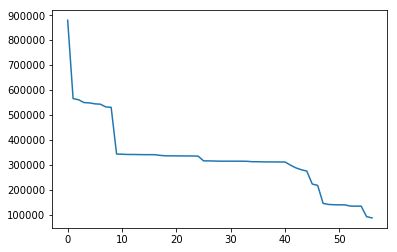

count        57.000000
mean     325430.719298
std      141796.125612
min       86867.000000
25%      287521.000000
50%      314450.000000
75%      340590.000000
max      879666.000000
dtype: float64

2) Cropping the serie: (80.0% of middle points only)


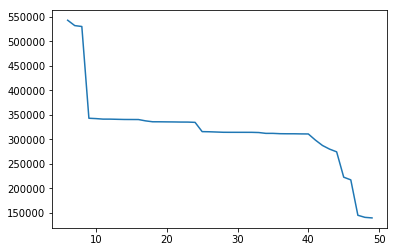

count        44.000000
mean     319129.931818
std       78607.114568
min      139707.000000
25%      311328.500000
50%      314721.000000
75%      338430.000000
max      543076.000000
dtype: float64
3) Log on time graph of the serie


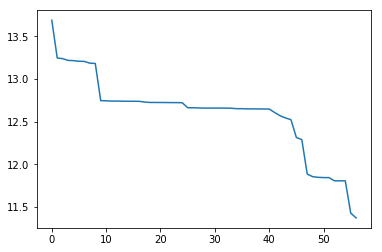

count    57.000000
mean     12.595063
std       0.467450
min      11.372145
25%      12.569055
50%      12.658584
75%      12.738438
max      13.687299
dtype: float64



In [228]:
perform_analysis_on(576, 575, '9 cases (5%) with 57 delays in total')

## Many pairs per case

--- 115 cases (74%) with 696 delays in total ---

C_560: [CONTROL/${ANT}/FrontEnd - void FrontEndImpl::optimizeSinglePolInternal(ReceiverBandMod::ReceiverBand, int, float&, float&)] Pol${N}: ijc=${N},ij${N}=${N},ij${N}=${N}

C_559: [CONTROL/${ANT}/FrontEnd - void FrontEndImpl::optimizeSinglePolInternal(ReceiverBandMod::ReceiverBand, int, float&, float&)] Pol${N}: ij=${N},my=${N},ny=${N},ij${N}=${N}

[2015519, 2003645, 1972013, 1951052, 1903559, 924403, 909427, 906025, 882131, 695334, 684606, 634491, 621634, 597189, 566032, 533568, 500321, 456748, 443281, 441089, 437579, 425005, 420011, 410489, 410366, 405261, 400624, 395853, 392975, 390725, 386463, 384573, 383788, 383432, 382786, 382761, 382028, 381427, 380437, 376824, 373588, 372978, 367461, 367374, 367314, 367128, 365883, 365092, 343959, 334101] ... (596 ommited) ... [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

1) Raw serie:


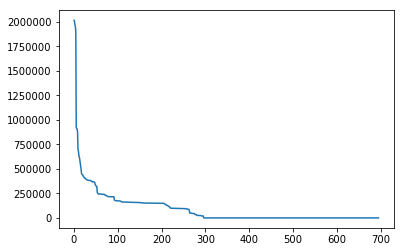

count    6.960000e+02
mean     9.503752e+04
std      2.087716e+05
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.508345e+05
max      2.015519e+06
dtype: float64

2) Cropping the serie: (80.0% of middle points only)


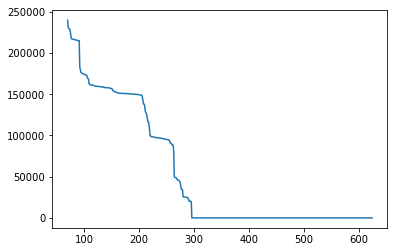

count       555.000000
mean      53773.115315
std       73142.724805
min           0.000000
25%           1.000000
50%           1.000000
75%      138030.500000
max      239628.000000
dtype: float64
3) Log on time graph of the serie


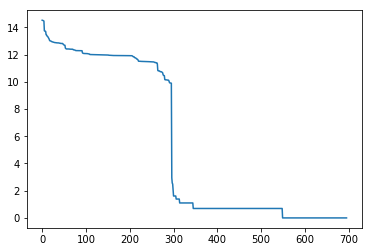

count    696.000000
mean       5.386852
std        5.701640
min        0.000000
25%        0.693147
50%        0.693147
75%       11.923945
max       14.516388
dtype: float64



In [229]:
perform_analysis_on(560, 559, '115 cases (74%) with 696 delays in total')

--- 92 cases (59%) with 535 delays in total ---

C_543: [CONTROL/${ANT}/FrontEnd/ACD - void ACDImpl::setCalibrationDeviceBandInternal(CalibrationDeviceMod::CalibrationDevice, ReceiverBandMod::ReceiverBand)] Setting Ambient load in front of band ${N}

C_544: [CONTROL/${ANT}/FrontEnd/ACD - void ACDImpl::setCalibrationDeviceBandInternal(CalibrationDeviceMod::CalibrationDevice, ReceiverBandMod::ReceiverBand)] Setting Hot load in front of band ${N}

[28806, 28804, 28802, 28802, 28802, 28801, 28800, 28800, 28799, 28793, 27015, 7778, 7776, 6099, 6073, 6067, 6066, 6062, 6057, 6057, 6056, 6056, 6055, 6055, 6055, 6055, 6055, 6055, 6055, 6054, 6054, 6054, 6054, 6054, 6054, 6054, 6054, 6054, 6054, 6054, 6054, 6054, 6054, 6054, 6053, 6052, 6052, 6052, 6052, 6052] ... (435 ommited) ... [6045, 6045, 6045, 6045, 6045, 6045, 6045, 6044, 6044, 6044, 6044, 6044, 6044, 6044, 6043, 6043, 6043, 6043, 6043, 6043, 6043, 6043, 6042, 6042, 6042, 6042, 6042, 6042, 6042, 6042, 6042, 6042, 6042, 6041, 6041, 6041, 

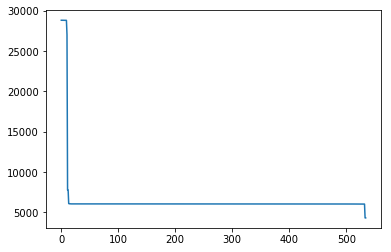

count      535.000000
mean      6512.671028
std       3213.092999
min       4320.000000
25%       6047.000000
50%       6048.000000
75%       6049.000000
max      28806.000000
dtype: float64

2) Cropping the serie: (80.0% of middle points only)


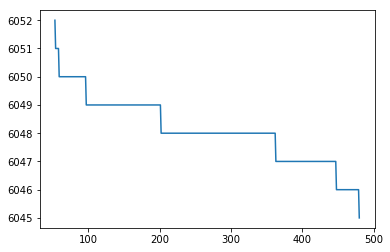

count     428.000000
mean     6048.112150
std         1.118941
min      6045.000000
25%      6047.000000
50%      6048.000000
75%      6049.000000
max      6052.000000
dtype: float64
3) Log on time graph of the serie


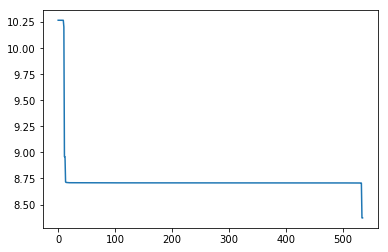

count    535.000000
mean       8.739328
std        0.222383
min        8.371242
25%        8.707483
50%        8.707648
75%        8.707814
max       10.268374
dtype: float64



In [230]:
perform_analysis_on(543, 544, '92 cases (59%) with 535 delays in total')

--- 151 cases (97%) with 429 delays in total ---

C_535: [CONTROL/${ANT}/FrontEnd/IFSwitch - ] ContainerServices::getComponentNonSticky(CONTROL/${ANT}/IFProc_A)

C_536: [CONTROL/${ANT}/FrontEnd/IFSwitch - ] ContainerServices::getComponentNonSticky(CONTROL/${ANT}/IFProc_B)

[36, 34, 32, 27, 26, 24, 19, 18, 17, 17, 17, 16, 16, 16, 16, 16, 15, 15, 15, 15, 15, 15, 14, 14, 14, 14, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 12, 12, 12, 12, 12, 12, 11, 11, 11, 11, 11] ... (329 ommited) ... [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

1) Raw serie:


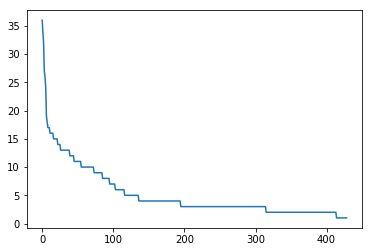

count    429.00000
mean       5.25641
std        4.84522
min        1.00000
25%        2.00000
50%        3.00000
75%        6.00000
max       36.00000
dtype: float64

2) Cropping the serie: (80.0% of middle points only)


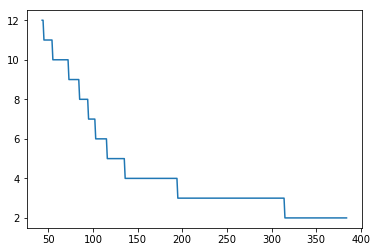

count    342.000000
mean       4.304094
std        2.562059
min        2.000000
25%        3.000000
50%        3.000000
75%        5.000000
max       12.000000
dtype: float64
3) Log on time graph of the serie


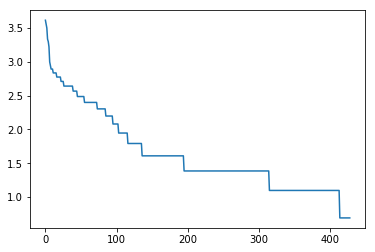

count    429.000000
mean       1.637077
std        0.580300
min        0.693147
25%        1.098612
50%        1.386294
75%        1.945910
max        3.610918
dtype: float64



In [231]:
perform_analysis_on(535, 536, '151 cases (97%) with 429 delays in total')

--- 28 instances (18%) with 102 delays in total ---

C_556: [CONTROL/${ANT}/FrontEnd - void FrontEndImpl::lockFrontEndInternal(Control::FrontEnd::SubscanInformation, bool, bool)] Setting band ${N} park frequency to ${N}

C_393: [CONTROL/${ANT}/FrontEnd/WCA${N} - SetFrequency] WCA Frequency set to: ${N}

[5, 5, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2] ... (2 ommited) ... [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

1) Raw serie:


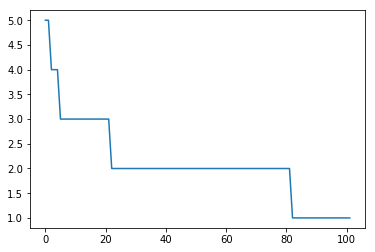

count    102.000000
mean       2.088235
std        0.809632
min        1.000000
25%        2.000000
50%        2.000000
75%        2.000000
max        5.000000
dtype: float64

2) Cropping the serie: (80.0% of middle points only)


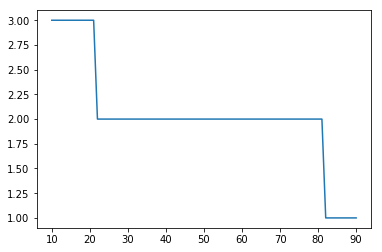

count    81.000000
mean      2.037037
std       0.510990
min       1.000000
25%       2.000000
50%       2.000000
75%       2.000000
max       3.000000
dtype: float64
3) Log on time graph of the serie


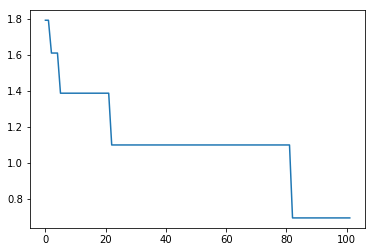

count    102.000000
mean       1.095672
std        0.252470
min        0.693147
25%        1.098612
50%        1.098612
75%        1.098612
max        1.791759
dtype: float64



In [232]:
perform_analysis_on(556, 393, '28 instances (18%) with 102 delays in total')

## One delay per case

--- 155 instances (100%) with 155 delays in total ---

C_505: [CONTROL/${ANT}/cppContainer-GL - ] Switched state of component CONTROL/${ANT}/TOTALPOWER: NEW -> INITIALIZING

C_513: [CONTROL/${ANT}/IFProc_B - beginDataAcquisition] Data acquisition activated.

[4491, 2817, 2787, 2710, 2690, 2668, 2639, 2639, 2615, 2614, 2596, 2593, 2591, 2590, 2590, 2584, 2565, 2563, 2561, 2559, 2559, 2557, 2557, 2550, 2547, 2543, 2539, 2538, 2538, 2537, 2535, 2534, 2526, 2523, 2521, 2520, 2517, 2512, 2510, 2506, 2495, 2490, 2486, 2485, 2479, 2478, 2477, 2467, 2461, 2456] ... (55 ommited) ... [2165, 2157, 2154, 2138, 2130, 2036, 426, 257, 244, 165, 156, 153, 153, 146, 133, 133, 133, 128, 120, 107, 100, 99, 97, 97, 96, 96, 91, 90, 84, 79, 74, 73, 72, 72, 67, 66, 66, 59, 59, 58, 56, 51, 49, 49, 46, 43, 43, 42, 40, 34]

1) Raw serie:


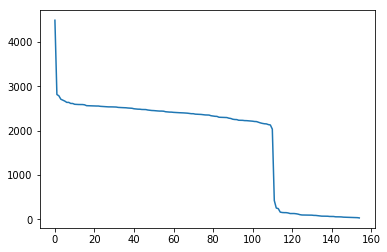

count     155.000000
mean     1778.103226
std      1079.631077
min        34.000000
25%       154.500000
50%      2354.000000
75%      2508.000000
max      4491.000000
dtype: float64

2) Cropping the serie: (80.0% of middle points only)


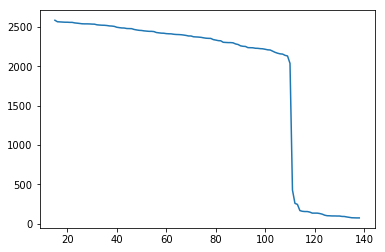

count     124.000000
mean     1880.225806
std       955.858962
min        72.000000
25%      2150.000000
50%      2355.000000
75%      2477.250000
max      2584.000000
dtype: float64
3) Log on time graph of the serie


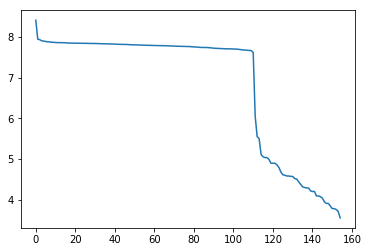

count    155.000000
mean       6.855576
std        1.528681
min        3.555348
25%        5.046599
50%        7.764296
75%        7.827639
max        8.410053
dtype: float64



In [233]:
perform_analysis_on(505, 513, '155 instances (100%) with 155 delays in total')


--- 155 instances (100%) with 155 delays in total ---

C_483: [maci::LibraryManager - maci::LibraryManager::load] Request to load 'AntInterferometryController'.

C_513: [CONTROL/${ANT}/IFProc_B - beginDataAcquisition] Data acquisition activated.

[329128, 46018, 34040, 33951, 33302, 31914, 31317, 31250, 31158, 30899, 30601, 30343, 29518, 29401, 28456, 28196, 27578, 27434, 26906, 26478, 26464, 26404, 26251, 25189, 25084, 24957, 24700, 24668, 24576, 24521, 24429, 24285, 24153, 23979, 23913, 23863, 23847, 23818, 23812, 23449, 23448, 23422, 23213, 23106, 23105, 23099, 23098, 23098, 23092, 22950] ... (55 ommited) ... [19573, 19568, 19542, 19500, 19452, 19417, 19366, 19300, 19280, 19278, 19245, 19229, 19226, 19189, 19121, 19089, 19051, 18983, 18962, 18908, 18893, 18760, 18737, 18732, 18705, 18567, 18512, 18418, 18287, 18262, 18157, 18148, 18064, 17949, 17687, 17666, 17638, 17604, 17449, 17429, 17370, 17347, 17257, 17244, 17130, 16480, 16091, 15966, 15594, 15365]

1) Raw serie:


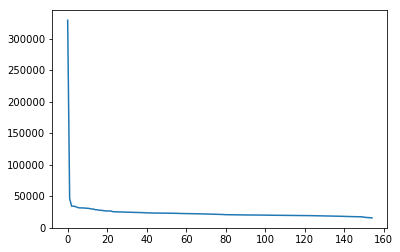

count       155.000000
mean      23971.670968
std       25047.070863
min       15365.000000
25%       19237.000000
50%       21146.000000
75%       23630.500000
max      329128.000000
dtype: float64

2) Cropping the serie: (80.0% of middle points only)


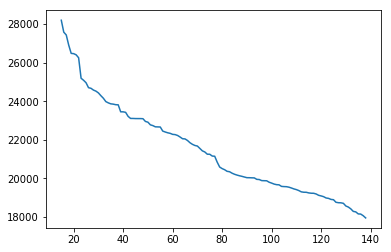

count      124.000000
mean     21475.774194
std       2410.816381
min      17949.000000
25%      19531.500000
50%      21151.000000
75%      23098.250000
max      28196.000000
dtype: float64
3) Log on time graph of the serie


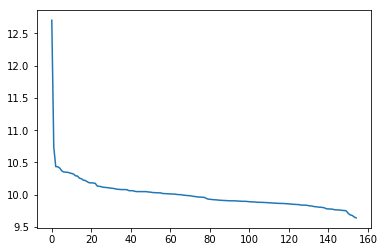

count    155.000000
mean       9.999262
std        0.281408
min        9.639913
25%        9.864643
50%        9.959253
75%       10.070306
max       12.704205
dtype: float64



In [234]:
perform_analysis_on(483, 513, '155 instances (100%) with 155 delays in total')

--- 133 instances (85%) with 133 delays in total ---

C_492: [CONTROL/${ANT}/cppContainer-GL - ] Switched state of component CONTROL/${ANT}/AntInterferometryController: OPERATIONAL -> DESTROYING

C_493: [CONTROL/${ANT}/cppContainer-GL - ] Switched state of component CONTROL/${ANT}/AntInterferometryController: DESTROYING -> DEFUNCT

[4, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] ... (33 ommited) ... [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

1) Raw serie:


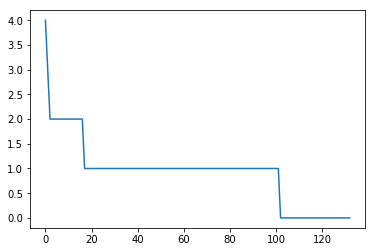

count    133.000000
mean       0.917293
std        0.663383
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        4.000000
dtype: float64

2) Cropping the serie: (80.0% of middle points only)


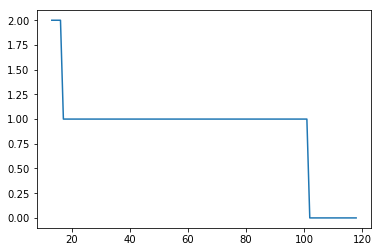

count    106.000000
mean       0.877358
std        0.429902
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        2.000000
dtype: float64
3) Log on time graph of the serie


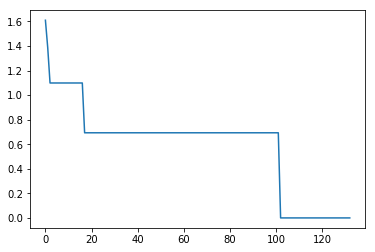

count    133.000000
mean       0.589417
std        0.361489
min        0.000000
25%        0.693147
50%        0.693147
75%        0.693147
max        1.609438
dtype: float64



In [235]:
perform_analysis_on(492, 493, '133 instances (85%) with 133 delays in total')

## One delay per case, but in a few cases only

--- 60 instances (38%) with 60 delays in total ---

C_491: [CONTROL/${ANT}/AntInterferometryController - ] ContainerServices::getComponentNonSticky(CONTROL/${ANT}/WVR)

C_525: [CONTROL/${ANT}/FrontEnd - void FrontEndImpl::selectBandInternal(ReceiverBandMod::ReceiverBand)] Receiver band #${N} has been selected

[132896, 126295, 125513, 122064, 116041, 109825, 109691, 108361, 106856, 101876, 98832, 97875, 96715, 93163, 91929, 88818, 88742, 88435, 87295, 87179, 85633, 85464, 84011, 83718, 80649, 80319, 78282, 77679, 76782, 74696, 73516, 72632, 72084, 71781, 70924, 70821, 70545, 68668, 68532, 67700, 66863, 66237, 65472, 64543, 57811, 53065, 52736, 51251, 47856, 46789, 44545, 44266, 42367, 33691, 33599, 33151, 33142, 32261, 28072, 27797]

1) Raw serie:


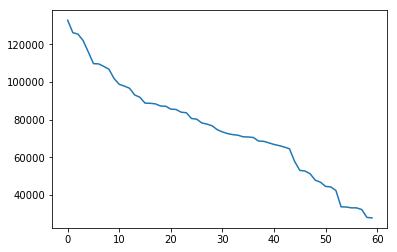

count        60.000000
mean      75305.850000
std       26438.542718
min       27797.000000
25%       56624.500000
50%       74106.000000
75%       89595.750000
max      132896.000000
dtype: float64

2) Cropping the serie: (80.0% of middle points only)


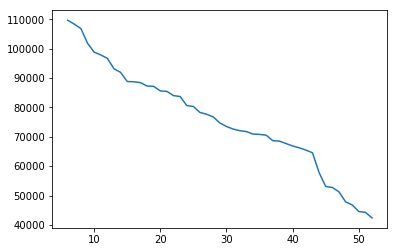

count        47.00000
mean      75829.87234
std       17684.61568
min       42367.00000
25%       66550.00000
50%       74696.00000
75%       87865.00000
max      109691.00000
dtype: float64
3) Log on time graph of the serie


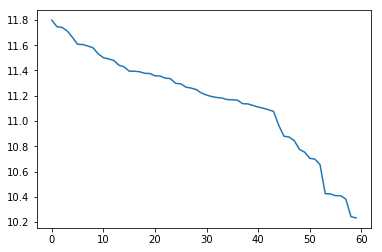

count    60.000000
mean     11.158873
std       0.397526
min      10.232719
25%      10.943537
50%      11.213234
75%      11.402963
max      11.797330
dtype: float64



In [236]:
perform_analysis_on(491, 525, '60 instances (38%) with 60 delays in total')

--- 81 instances (52%) with 81 delays in total ---

C_513: [CONTROL/${ANT}/IFProc_B - beginDataAcquisition] Data acquisition activated.

C_408: [CONTROL/${ANT}/LOtwoBBpr_D - virtual void LO${N}Engine::setFrequency(double, Control::LOOffsettingMode, NetSidebandMod::NetSideband, ACS::Time)] Setting the LO${N} frequency to ${N}GHz at ${N}:${N}:${N}. This baseband is above the first LO. No LO offsetting will be used Retuning as this is diferent from the current state at this time

[1101421, 587363, 584790, 566311, 89236, 85687, 75372, 70135, 69556, 67599, 66326, 65403, 62780, 59229, 57496, 55370, 55324, 54800, 54311, 53742, 53381, 51692, 51299, 50314, 48040, 47709, 47534, 46426, 45905, 44926, 44731, 44300, 43874, 43075, 42909, 42666, 42592, 41723, 41721, 41587, 40685, 40567, 38595, 38441, 38349, 37902, 37682, 37138, 36922, 36377, 36231, 34203, 34081, 33571, 28866, 28625, 26967, 26166, 25513, 24969, 24387, 23841, 20084, 19974, 19074, 17437, 15720, 15573, 15111, 14761, 14231, 13985, 13827, 1

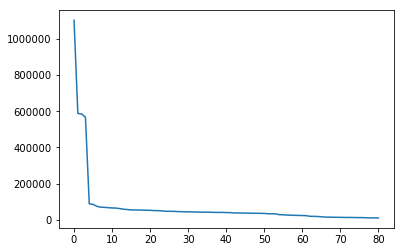

count    8.100000e+01
mean     7.169778e+04
std      1.559462e+05
min      1.125400e+04
25%      2.438700e+04
50%      4.068500e+04
75%      5.338100e+04
max      1.101421e+06
dtype: float64

2) Cropping the serie: (80.0% of middle points only)


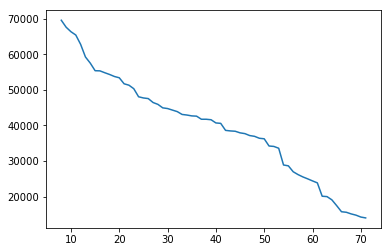

count       64.000000
mean     39599.500000
std      14597.861487
min      13985.000000
25%      28210.500000
50%      41136.000000
75%      48608.500000
max      69556.000000
dtype: float64
3) Log on time graph of the serie


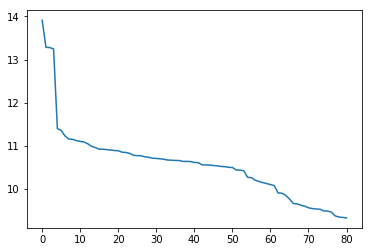

count    81.000000
mean     10.569398
std       0.857000
min       9.328568
25%      10.101846
50%      10.613639
75%      10.885229
max      13.912113
dtype: float64



In [237]:
perform_analysis_on(513, 408, '81 instances (52%) with 81 delays in total')